# SF-DAT-21 | Unit Project 4

In this project, you will summarize and present your analysis from Unit Projects 1-3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

In [2]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()

### Question 1. Introduction: Write a problem Statement/Specific Aim for this project.

Answer: Using GRE, GPA, and prestige as predictors from the data in admissions.csv, determine how likely individuals are to be admitted into grad school.

### Question 2. Dataset: Write up a description of your data and any cleaning that was completed.

Answer: The dataset is made up of 4 columns — Admit, GRE, GPA, and Prestige. There are 400 observations/rows. See below for a data dictionary. Admit is the response variable and GRE, GPA, and Prestige are potential predictors.

Variable | Description | Type of Variable
---|:---:|---:
Admit | Admitted to Grad School (0 = Not admitted, 1 = Admitted) | Categorical
GRE | Graduate Record Examination (200–800, in 10-point increments) | Continuous
GPA | Grade Point Average (0.00–4.00) | Categorical
Prestige | Rank of undergrad college (1-4) | Categorical

As for cleaning, 3 data points with missing data(NaN) were dropped, resulting in 397 data points used in the analyses. Categorical variables (ie Prestige) were transformed to binary via dummies variables. 




### Question 3. Demo: Provide a table that explains the data by admission status.

Mean (STD) or counts by admission status for each variable

| Not Admitted | Admitted
---| ---|---
GPA | mean(3.35) | mean(3.49)
GRE |mean(574) | mean(619)
Prestige 1 | frequency (7%) | frequency (8%)
Prestige 2 | frequency (24%) | frequency (13%)
Prestige 3 |frequency (23%) | frequency (7%)
Prestige 4 |frequency (14%) | frequency (3%)

In [3]:
#mean gpa not admitted
df[(df.admit == 0)]['gpa'].mean()

3.347158671586714

In [4]:
#mean gpa admitted
df[(df.admit == 1)]['gpa'].mean()

3.4892063492063485

In [5]:
#mean gre not admitted
df[(df.admit == 0)]['gre'].mean()

573.5793357933579

In [6]:
#mean gre admitted
df[(df.admit == 1)]['gre'].mean()

618.5714285714286

In [7]:
#prestige counts not admitted
(df[(df.admit == 0)].prestige.value_counts()/397)*100

2.0    23.929471
3.0    23.425693
4.0    13.853904
1.0     7.052897
Name: prestige, dtype: float64

In [8]:
((df.admit == 0).sum()/397.)*100

68.261964735516372

In [9]:
24+23+14+7

68

In [10]:
#prestige counts admitted
(df[(df.admit == 1)].prestige.value_counts()/397)*100

2.0    13.350126
1.0     8.312343
3.0     7.052897
4.0     3.022670
Name: prestige, dtype: float64

In [11]:
((df.admit == 1).sum()/397.)*100

31.738035264483628

In [12]:
13+8+7+3

31

### Question 4. Methods: Write up the methods used in your analysis.

Answer: I plotted the data using boxplots and histograms. I also used a correalation matrix to look for signal. Lastly, I used a statsmodel logistic regression using covariates GRE, GPA, Prestige_2, Prestige_3, and Prestige_4.  

### Question 5. Results: Write up your results.

Answer: Looking at the results of the statsmodel logistic regression, we see the the coefficients for gre and gpa are not statisically significant. This suggests that these variables are not significantly associated with admit. A correlation matrix also corroborates that there is not a strong relationship. On the other hand, coefficients for prestige (as dummy variables) are significant, meaning changes in prestige is related to admit. In fact, we we see that the coefficients are negative and increase in magnitude with ranking of college. Meaning the worse the college is ranked, the more predictive power it has as to whether an individual is admitted or not.


<img src="logistic_regression.png">

### Question 6. Visuals: Provide a table or visualization of these results.

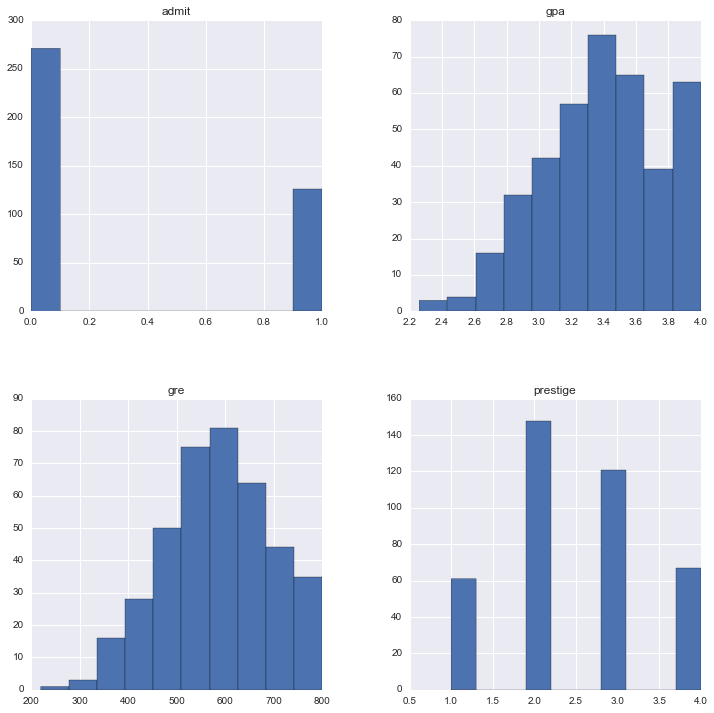

In [13]:
df.hist(figsize = (12, 12))
pl.show()

### question 7. Discussion: Write up your discussion and future steps.

Answer: Next steps would be to split train/test this model and others to see what performs the best in cross-validation. Beyond that, looking to collect more data on gender, race, and socio-economic factors would certainly be helpful to building a better predictive model.